Facebook недавно представил новую систему ставок под названием «средняя ставка» (тестовая группа) наряду с существующей системой «максимальная ставка» (контрольная группа). Эти системы ставок определяют, какие объявления будут отображаться пользователям, в зависимости от того, сколько рекламодатели готовы платить.

При «максимальной ставке» рекламодатели указывают максимальную сумму, которую они готовы платить за каждый показ. Например, рекламодатель может сказать: «Я готов платить максимум 10 долларов за каждый показ».

При «средней ставке» рекламодатели указывают среднюю сумму, которую они готовы платить за показы. Например, они могут сказать: «В среднем я готов платить 6 долларов за каждый показ».

Вот ключевой момент: в этом наборе данных мы собрали результаты этих двух стратегий назначения ставок за последние 40 дней, чтобы увидеть, какая из них более эффективна для показа рекламы целевой аудитории.

Как дальновидная компания, готовая произвести фурор в сфере рекламы на Facebook, мы ставим перед собой задачу найти наиболее выгодный подход для нашего бренда. Наши животрепещущие вопросы:

1. Увеличение количества кликов и покупок. Какая стратегия поможет нам достичь нашей цели — резкого увеличения количества кликов и покупок?
2. Битва Титанов: есть ли заметная и статистически значимая разница между двумя вариантами ставок?

Примите участие в тесте AB: сегодня мы отправляемся в путь открытий, основанных на данных, где столкновение титанов — средняя ставка против максимальной ставки — будет тщательно анализироваться и оцениваться. Мы находимся в поисках идей, которые определят будущее нашей рекламной стратегии Facebook, используя данные как компас, а инновации как наше оружие.

Результаты этого AB-теста не только ответят на наши вопросы, но и станут предвестником славной эпохи в нашей рекламной деятельности в Facebook. Следите за трансформацией, которая оставит след в сфере цифровой рекламы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
c_df = pd.read_csv("control_group.csv") #Читаем файл контрольной группы (максимальная ставка)

In [3]:
t_df = pd.read_csv("test_group.csv") #Читаем файл тестовой группы (средняя ставка)

In [4]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [5]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [6]:
c_df.head()

,Impression,Click,Purchase,Earning
0,82529,6090,665,2311
1,98050,3383,315,1743
2,82696,4168,458,1798
3,109914,4911,487,1696
4,108458,5988,441,1544


In [7]:
t_df.head()

,Impression,Click,Purchase,Earning
0,120104,3217,702,1940
1,134776,3635,834,2929
2,107807,3057,423,2526
3,116445,4650,429,2281
4,145083,5201,750,2782


Impression - количество показов одной рекламы                                   
Click - количество кликов на рекламе                                   
Purchase - количество товаров, купленных после рекламы                                   
Earning - заработок после покупки                                   

## Очистка и проверка данных

In [18]:
c_df.isna().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [19]:
t_df.isna().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

Пустых данных нет

### Количество показов 

In [38]:
pd.DataFrame([c_df.Impression.describe(), t_df.Impression.describe()], index=['control', 'test'])

,count,mean,std,min,25%,50%,75%,max
control,40.0,101711.450,20302.122984,45476.0,85726.75,99790.5,115212.50,147539.0
data,40.0,120512.425,18807.466616,79034.0,112692.25,119291.5,132050.75,158606.0


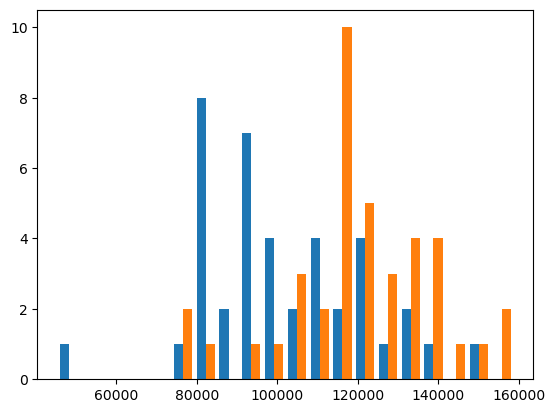

In [78]:
plt.hist([c_df.Impression, t_df.Impression], bins=20)
plt.show()

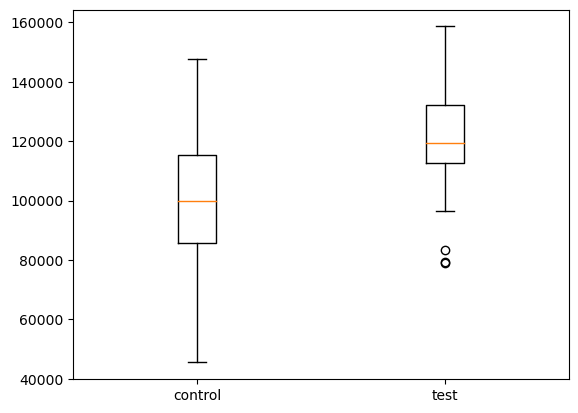

In [30]:
plt.boxplot([c_df.Impression, t_df.Impression], labels=['control', 'test'])
plt.show()

У тестовой группы есть выбросы! Также по графикам можно увидеть, что размах количества показов у тестовой группы меньше, медиана больше.

In [54]:
q3, q1 = np.percentile(t_df.Impression, [75, 25])
iqr = q3 - q1

In [55]:
low_range = q1 - 1.5 * iqr
print(f'Нижняя граница: {low_range}')

Нижняя граница: 83654.5


In [60]:
t_df[t_df.Impression < low_range].Impression

17    83357
35    79235
38    79034
Name: Impression, dtype: int64

In [61]:
(t_df[t_df.Impression < low_range].Impression - low_range) / t_df.Impression.mean() * 100

17   -0.246863
35   -3.667257
38   -3.834044
Name: Impression, dtype: float64

Всего в данных 3 выброса из 40. Они отличаются макисмум на -3.8% от среднего значения. Так как эти значения получены во время тестирования, то удалять их не нужно. Так как неизвестно какие именно эти дни тестирования, то может быть выбросы обусловлены другими факторами (праздники, сбои у интернет провайдеров и т.п.).
Создадим еще один датафрейм, чтобы проверить, влияют ли выбросы на результаты тестирования.

In [68]:
t1_df = t_df[t_df.Impression >= low_range]
t1_df.head()

,Impression,Click,Purchase,Earning
0,120104,3217,702,1940
1,134776,3635,834,2929
2,107807,3057,423,2526
3,116445,4650,429,2281
4,145083,5201,750,2782


In [70]:
print(f'Количество значений без выбросов: {len(t1_df)}')

Количество значений без выбросов: 37


### Количество кликов

In [37]:
pd.DataFrame([c_df.Click.describe(), t_df.Click.describe()], index=['control', 'test'])

,count,mean,std,min,25%,50%,75%,max
control,40.0,101711.450,20302.122984,45476.0,85726.75,99790.5,115212.50,147539.0
data,40.0,120512.425,18807.466616,79034.0,112692.25,119291.5,132050.75,158606.0


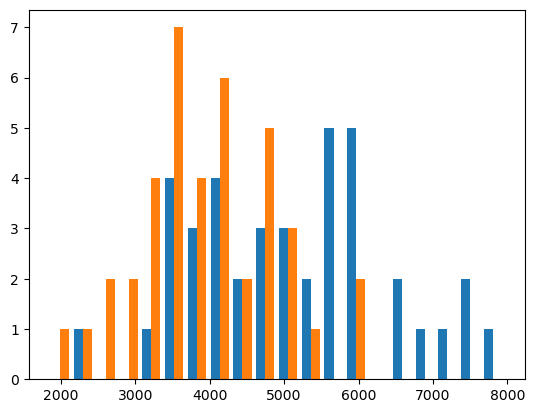

In [80]:
plt.hist([c_df.Click, t_df.Click], bins=20)
plt.show()

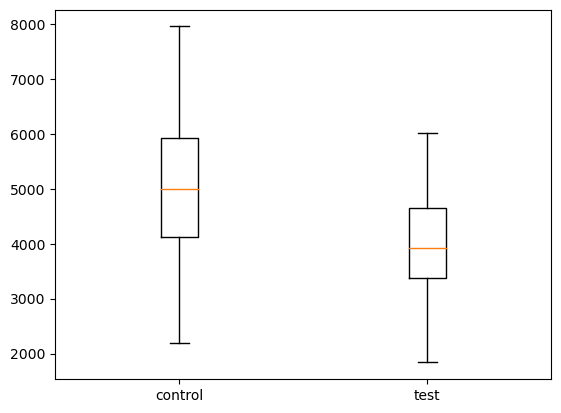

In [31]:
plt.boxplot([c_df.Click, t_df.Click], labels=['control', 'test'])
plt.show()

Выбросы отсутствуют, размах и медиана тестовой группы меньше, чем у контрольной. Выбросов нет.

### Количество покупок 

In [40]:
pd.DataFrame([c_df.Purchase.describe(), t_df.Purchase.describe()], index=['control', 'test'])

,count,mean,std,min,25%,50%,75%,max
control,40.0,550.90,134.110517,267.0,470.50,531.5,638.00,802.0
test,40.0,582.05,161.175164,312.0,444.75,551.0,699.75,890.0


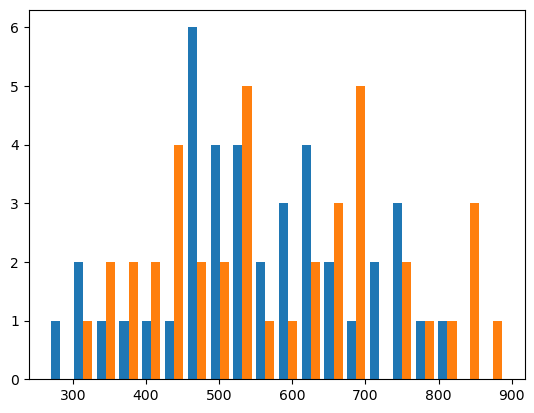

In [81]:
plt.hist([c_df.Purchase, t_df.Purchase], bins=20)
plt.show()

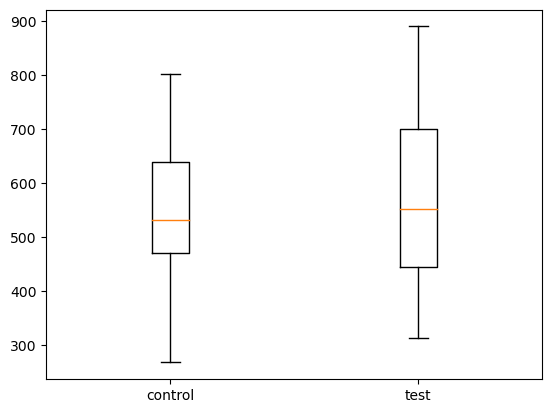

In [32]:
plt.boxplot([c_df.Purchase, t_df.Purchase], labels=['control', 'test'])
plt.show()

Размах тестовой группы больше чем у контрольной, медианы значительно не отличаются. Выбросов нет.

### Заработок

In [42]:
pd.DataFrame([c_df.Earning.describe(), t_df.Earning.describe()], index=['control', 'test'])

,count,mean,std,min,25%,50%,75%,max
control,40.0,1908.575,302.868329,1254.0,1685.75,1975.0,2120.00,2497.0
test,40.0,2514.925,282.707912,1940.0,2280.25,2544.5,2761.75,3171.0


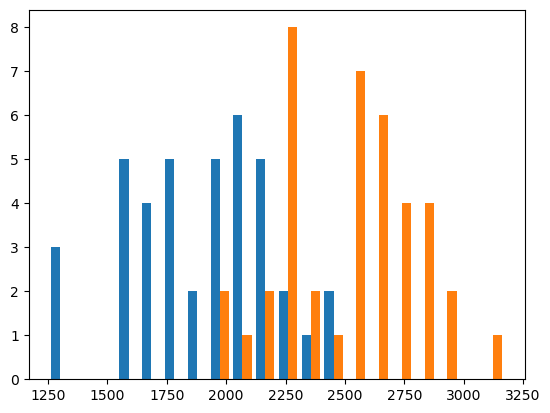

In [79]:
plt.hist([c_df.Earning, t_df.Earning], bins=20)
plt.show()

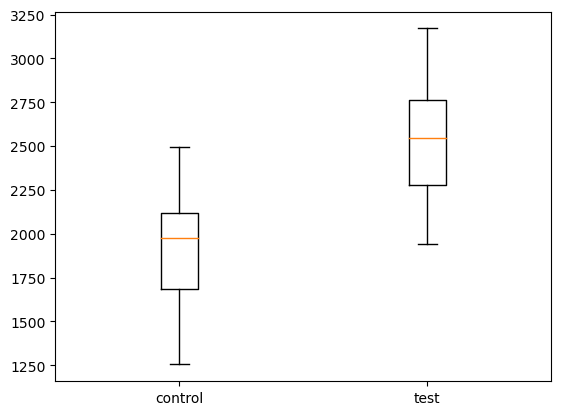

In [33]:
plt.boxplot([c_df.Earning, t_df.Earning], labels=['control', 'test'])
plt.show()

Средний заработок тестовой группы значительно больше (максимальное значение контрольной группы почти равно среднему значению тестовой). Выбросов нет.

Также по минимальным значениям можно увидеть, что среди значений данных отсутствуют отрицательные и нулевые значения!

## A/B Тестирование

### CTR

Требуется узнать увеличиваются ли клики, для этого используем метрику CTR.                        
Сформулируем гипотезы:                                      
Н0: p1 - p2 <= 0 (Конверсия рекламы осталась такая же или уменьшилась)                           
Н1: p1 - p2 > 0 (Конверсия рекламы увеличилась)                    
Метрика конверсионная, поэтому используем z-тест для пропорций

In [120]:
p1 = round(t_df.Click.sum() / t_df.Impression.sum(), 4)
p2 = round(c_df.Click.sum() / c_df.Impression.sum(), 4)

In [121]:
print(f'Конверсия рекламы в тестовой группе: {p1}')
print(f'Конверсия рекламы в контрольной группе: {p2}')

Конверсия рекламы в тестовой группе: 0.0329
Конверсия рекламы в контрольной группе: 0.0501


In [138]:
z_score, p_score = sm.stats.proportions_ztest(count=np.array([p1, p2]), nobs=np.array([40, 40]), alternative='larger')

In [141]:
z_score

-0.05973306613641454

In [142]:
p_score

0.5238158821116153

Значение p оказалось больше 0.05, поэтому не отвергаем нулевую гипотезу.

#### Тестирование с выбросами

In [112]:
p1v = round(t1_df.Click.sum() / t1_df.Impression.sum(), 4)
z_scorev, p_scorev = sm.stats.proportions_ztest(np.array([p1v, p2]), np.array([len(t1_df), len(c_df)]), alternative = 'larger')

In [113]:
z_scorev

-0.055646318243214137

In [114]:
p_scorev

0.5221882174890673

Если отбросить выбросы, то в тестировании значительно ничего не меняется.

### CR

Требуется узнать увеличиваются ли заказы, для этого используем метрику CR.                        
Сформулируем гипотезы:                                      
Н0: p1 - p2 <= 0 (Конверсия заказов осталась такая же или уменьшилась)                           
Н1: p1 - p2 > 0 (Конверсия заказов увеличилась)                    
Метрика конверсионная, поэтому используем z-тест для пропорций

In [143]:
p1 = round(t_df.Purchase.sum() / t_df.Click.sum(), 4)
p2 = round(c_df.Purchase.sum() / c_df.Click.sum(), 4)

In [144]:
z_score, p_score = sm.stats.proportions_ztest(np.array([p1, p2]), np.array([len(t_df), len(c_df)]), alternative = 'larger')

In [145]:
z_score

0.07680490175037229

In [146]:
p_score

0.46938937561348254

Значение p также больше 0.05, поэтому не отвергаем нулевую гипотезу. Увеличения покупок к кликам не произошло.